In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict 
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
%matplotlib inline

In [60]:
df1 = pd.read_csv('world-happiness/2015.csv')
df2 = pd.read_csv('world-happiness/2016.csv')
df3 = pd.read_csv('world-happiness/2017.csv')
df4 = pd.read_csv('world-happiness/2018.csv')
df5 = pd.read_csv('world-happiness/2019.csv')
df6_orig = pd.read_csv('world-happiness/2020.csv')
df6.head()

,Country,Regional indicator,Score,GDP,Social_support,HLE,Freedom,Generosity,Perceptions_of_Corruption
0,Finland,Western Europe,7.8087,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857
1,Denmark,Western Europe,7.6456,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260
2,Switzerland,Western Europe,7.5599,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946
3,Iceland,Western Europe,7.5045,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541
4,Norway,Western Europe,7.4880,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101


In [3]:
df6_orig.head()
df6 = df6_orig[['Country name','Regional indicator','Ladder score','Explained by: Log GDP per capita','Explained by: Social support','Explained by: Healthy life expectancy','Explained by: Freedom to make life choices','Explained by: Generosity','Explained by: Perceptions of corruption']]

In [4]:
df6.rename(columns={'Country name': 'Country','Reginonal indicator': 'Region','Ladder score': 'Score'},inplace=True)

C:\Users\Lingyan\Anaconda\lib\site-packages\pandas\core\frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


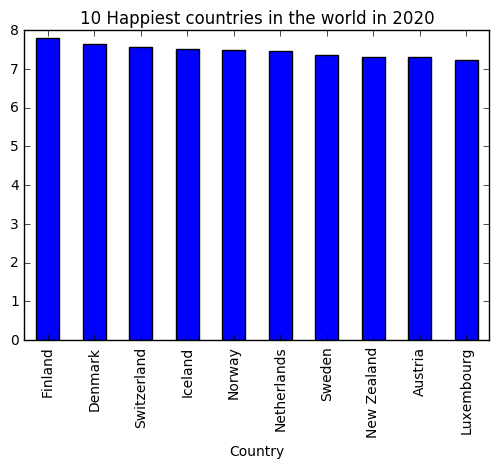

In [5]:
# Q1: Happiness place in the world in 2020 and world map of happiness 
happy_rank = df6[['Country','Score']].sort_values('Score',ascending=False)[:10]
happy_rank.set_index('Country', inplace=True)
happy_rank.plot(kind='bar', legend=None)
plt.title('10 Happiest countries in the world in 2020');
plt.style.use('ggplot')
plt.show()

(0, 10)

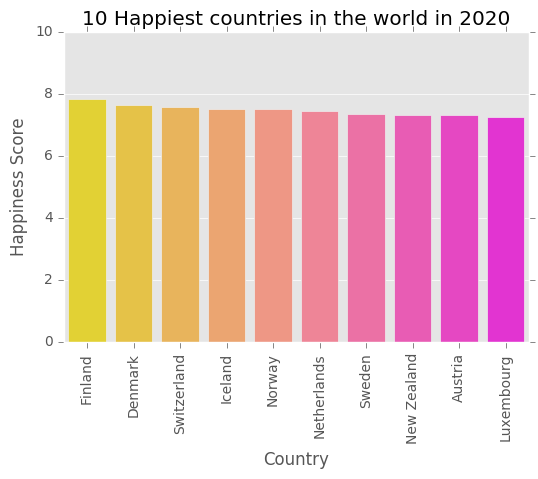

In [59]:
# plot the highest 10 average score countries with seaborn 
happy_rank = df6[['Country','Score']].sort_values('Score',ascending=False)[:10]
happy_rank.rename(columns = {'Score':'Happiness Score'},inplace=True)
sns.barplot(happy_rank['Country'],happy_rank['Happiness Score'],palette='spring_r')
plt.xticks(rotation=90)
plt.title('10 Happiest countries in the world in 2020');
plt.ylim((0,10))

In [7]:
# rank by region 
# merge data first 
df1_df6 = df6.merge(df1,how = 'inner',on = 'Country')
df1_df6.head()
region_mean_20 = df1_df6[['Regional indicator','Score']].groupby('Regional indicator').mean().sort_values('Score',ascending = False)

In [8]:
region_mean_20

,Score
Regional indicator,
North America and ANZ,7.173525
Western Europe,6.899219
Latin America and Caribbean,5.981786
Central and Eastern Europe,5.883818
East Asia,5.580825
Southeast Asia,5.383367
Commonwealth of Independent States,5.358342
Middle East and North Africa,5.227159
Sub-Saharan Africa,4.411611


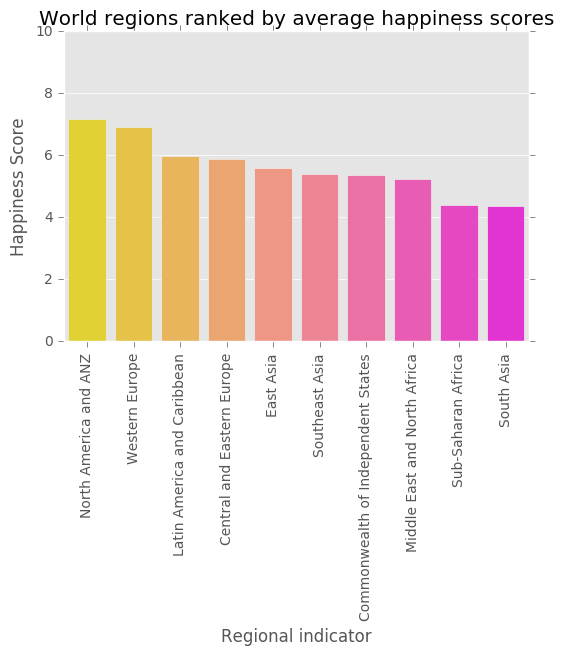

In [65]:
sns.barplot(region_mean_20.index, region_mean_20.rename(columns = {'Score':'Happiness Score'})['Happiness Score'],palette='spring_r')
plt.xticks(rotation=90)

fig = plt.gcf()
plt.ylim((0,10))
plt.title('World regions ranked by average happiness scores')
plt.show()


In [ ]:
# use d3 plot to create the world map 

In [10]:
df4.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [11]:
# Q2: Happiness change thru the years?
df1_score = df1[['Country','Region','Happiness Score']]
df2_score = df2[['Country','Happiness Score']]
df3_score = df3[['Country','Happiness.Score']]
df4_score = df4[['Country or region','Score']]
df5_score = df5[['Country or region','Score']]
df6_score = df6[['Country','Score']]
df1_score.rename(columns = {'Happiness Score':'Score1'},inplace = True)
df2_score.rename(columns = {'Happiness Score':'Score2'},inplace = True)
df3_score.rename(columns = {'Happiness.Score':'Score3'},inplace = True)
df4_score.rename(columns = {'Country or region':'Country','Score':'Score4'},inplace = True)
df5_score.rename(columns = {'Country or region':'Country','Score':'Score5'},inplace = True)
df6_score.rename(columns = {'Score':'Score6'},inplace = True)

C:\Users\Lingyan\Anaconda\lib\site-packages\pandas\core\frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [12]:
df_years = df1_score.merge(df2_score,how = 'inner',on = 'Country').merge(df3_score,how = 'inner',on = 'Country').merge(df4_score,how = 'inner',on = 'Country').merge(df5_score,how = 'inner',on = 'Country').merge(df6_score,how = 'inner',on = 'Country')
df_years.insert(8,'Diff',df_years['Score6']-df_years['Score1'])
df_years.head()

,Country,Region,Score1,Score2,Score3,Score4,Score5,Score6,Diff
0,Switzerland,Western Europe,7.587,7.509,7.494,7.487,7.480,7.5599,-0.0271
1,Iceland,Western Europe,7.561,7.501,7.504,7.495,7.494,7.5045,-0.0565
2,Denmark,Western Europe,7.527,7.526,7.522,7.555,7.600,7.6456,0.1186
3,Norway,Western Europe,7.522,7.498,7.537,7.594,7.554,7.4880,-0.0340
4,Canada,North America,7.427,7.404,7.316,7.328,7.278,7.2321,-0.1949


In [13]:
df_years2 = df1_score.append(df2_score).append(df3_score).append(df4_score).append(df5_score).append(df6_score)

In [14]:
# average rank?
sns.barplot(x = 'Country',y = 'Score',data = df_years2,palette='spring_r',order=df_years2[['Country','Score']].groupby('Country').mean().sort_values('Score',ascending = False).index[:10])
plt.xticks(rotation=70)
plt.tight_layout()

KeyError: "['Score'] not in index"

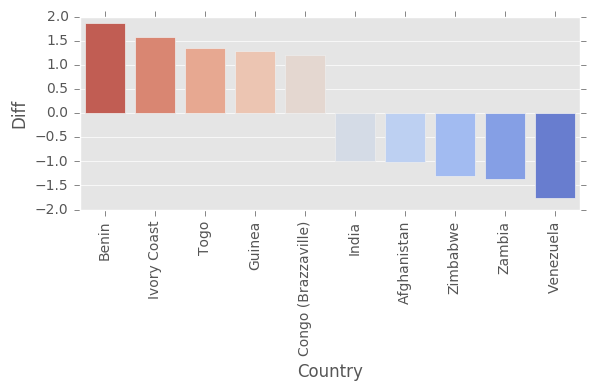

In [84]:
# First 10 Largest changes
sns.barplot(x = 'Country',y = 'Diff',data = df_years, palette='coolwarm_r',order = df_years.sort_values('Diff',ascending = False)['Country'][:5].append(df_years.sort_values('Diff')['Country'][:5].iloc[::-1]))
plt.xticks(rotation=90)
plt.tight_layout()

In [ ]:
# what contribute to happiness change 

In [16]:
# Q3: Can we predict happiness? (use 2020 dataset)
df6.rename(columns = {'Explained by: Log GDP per capita':'GDP',
                      'Explained by: Social support':'Social_support',
                      'Explained by: Healthy life expectancy':'HLE',
                     'Explained by: Freedom to make life choices':'Freedom',
                      'Explained by: Generosity':'Generosity',
                      'Explained by: Perceptions of corruption':'Perceptions_of_Corruption'},
          inplace = True)

C:\Users\Lingyan\Anaconda\lib\site-packages\pandas\core\frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [51]:
df = df6
df = df.dropna(subset = ['Score'],axis = 0)
X = df.drop(['Country','Score'],axis = 1)
y = df['Score']
num_vars = X.select_dtypes(include=['int','float']).columns 
for col in num_vars:
    X[col].fillna(X[col].mean(),inplace = True)
    
cat_vars = X.select_dtypes(include=['object']).columns 
for var in cat_vars:
    X = pd.concat([X.drop(var,axis = 1),pd.get_dummies(X[var],prefix=var,prefix_sep='_',drop_first=True)],axis = 1)
 

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [53]:
lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit

    #Predict using your model
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

    #Score using your model
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)


In [77]:
coefs_df = pd.DataFrame()
coefs_df['Factors'] = X_train.columns
coefs_df['Weights'] = lm_model.coef_
#coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
coefs_df = coefs_df.sort_values('Weights', ascending=False)

In [83]:
coefs_df.head().reset_index()[['Factors','Weights']]

,Factors,Weights
0,Generosity,1.486931
1,Freedom,1.438842
2,Social_support,0.915516
3,GDP,0.765970
4,HLE,0.693508


In [66]:
test_score


0.7275220956123611